<a href="https://colab.research.google.com/github/Patrick-Sinnott/Open-Quantum-Systems---Python-Assignments/blob/main/Worksheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Worksheet 2

### This is the second set of exercises for the Open Quantum Systems course. As before, there are both analytical and numerical components to the exercises. Each of the 8 questions below is worth 10 marks. 

---

1. Hamiltonian dynamics for mixed states (in the Schrödinger picture) is described by the von Neumann equation 

$$\frac{{\rm d}\hat{\rho}}{{\rm d}t} = \frac{1}{{\rm i}\hbar}[\hat{H},\hat{\rho}].$$

Suppose that the Hamiltonian comprises a sum of two terms, $\hat{H} = \hat{H}_0 + \hat{H}_1$. The density matrix in the interaction picture generated by $\hat{H}_0$ is defined by

$$ \hat{\rho}_I(t) = \hat{U}^\dagger_0(t,t_0) \hat{\rho}(t) \hat{U}_0(t,t_0),$$

where $\hat{U}_0(t,t_0) = {\rm e}^{-{\rm i}\hat{H}_0 (t-t_0)/\hbar}$, $\hat{\rho}(t)$ is the density matrix in the Schrödinger picture, and $t_0$ is an (arbitrary) initial time. Show that the state in the interaction picture obeys a differential equation of the form

$$ \frac{{\rm d}\hat{\rho}_I}{{\rm d}t} = \frac{1}{{\rm i}\hbar} [\hat{H}_I(t), \hat{\rho}_I(t)],$$

and give an explicit expression for the interaction-picture Hamiltonian $\hat{H}_I(t)$. What is the general solution of this equation in terms of the initial condition $\hat{\rho}(t_0)$?

2. A thermal equilibrium state is a mixed state with two key properties: <br>
(i) it is stationary (unchanging) under Hamiltonian dynamics and <br>
(ii) the probability $p_i$ of finding the system with energy $E_i$ is given by the Boltzmann distribution of statistical mechanics, i.e. $p_i = {\rm e}^{-\beta E_i}/Z$, where $\beta = 1/k_BT$ is the inverse temperature and $Z = \sum_i {\rm e}^{-\beta E_i}$ is the partition function.<br>
    
In quantum mechanics, the thermal state of a system whose dynamics are governed by the Hamiltonian $\hat{H}$ is given by
    
$$\hat{\rho}_\beta = \frac{{\rm e}^{-\beta \hat{H}}}{Z}, $$
    
where $Z = {\rm tr}[{\rm e}^{-\beta \hat{H}}]$.
    
(a) Show that this state obeys both properties (i) and (ii).    
    
(b) For a qubit with Hamiltonian $\hat{H} = \tfrac{1}{2}\hbar\omega \hat{\sigma}_z$, show that
    
$$ \hat{\rho}_\beta = \frac{1}{2}\left[\hat{\mathbb{1}} - \tanh(\beta\hbar\omega/2) \hat{\sigma}_z\right].$$
    
(Hint: take a look at Exercise 1(a), Worksheet 1)
    
(c) Find analytical expressions for the expectation values of the three Pauli matrices in the above thermal equilibrium state. Plot the thermal expectation value of $\langle \hat{\sigma}_z\rangle$ as a function of dimensionless temperature, $k_B T/\hbar\omega$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


Text(0.5, 1.0, 'Expectation value of <$\\sigma_z$>')

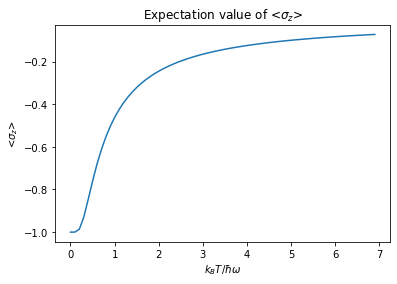

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Expt_Value_sigmaz(x):
  return - np.tanh(1/(2*x))

x = np.arange(0,7,0.1)
y = np.zeros(70)

for i in range(70):
  y[i] = Expt_Value_sigmaz(x[i])

plt.plot(x,y)
plt.xlabel('$k_B T/\hbar\omega$')
plt.ylabel('<$\sigma_z$>')
plt.title('Expectation value of <$\sigma_z$>')

3. The following function samples a "biased coin", which gives the result 0 (heads) with probability p and gives the result 1 (tails) with probability 1-p. Play around with it and try to understand how it works.

In [ ]:
from random import random
def biased_coin(p):
    r = random()
    if r<p:
        return 0
    else:
        return 1

(a) Plot a histogram of 200 realisations of the output of biased_coin() for p=0.3. (Hint: check out the [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function).

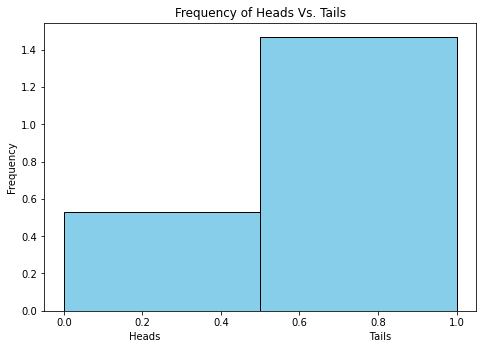

In [ ]:
Coin_flips = np.zeros(200)
for i in range(0,200):
  Coin_flips[i] = biased_coin(0.3)



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(Coin_flips, density=True, bins=2, color = 'skyblue', edgecolor = 'black')
ax.set_title('Frequency of Heads Vs. Tails')
ax.set_ylabel('Frequency')
ax.set_xlabel('Heads                                                                   Tails')

plt.show()


(b) Write an analogous function that samples a "three-sided coin", which yields the result 0 with probability $p_0$, 1 with probability $p_1$, and 2 with probability $1-p_0-p_1$. Plot a histogram of 200 samples of the output  for $p_0=0.2$ and $p_1 = 0.5$.

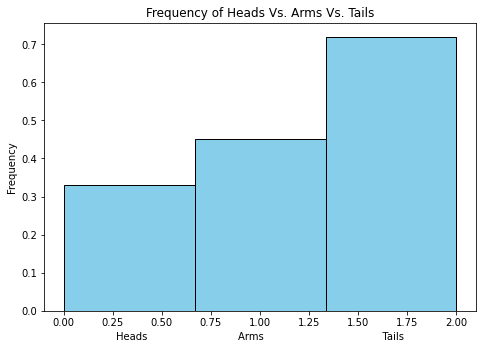

In [ ]:
def three_sided_biased_coin(p0,p1):
    r = random()
    if r<p0:
        return 0
    elif p0<r<p1:
        return 1
    else:
      return 2

Coin_flips2 = np.zeros(200)
for i in range(0,200):
  Coin_flips2[i] = three_sided_biased_coin(0.2,0.5)



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(Coin_flips2, density=True, bins=3, color = 'skyblue', edgecolor = 'black')
ax.set_title('Frequency of Heads Vs. Arms Vs. Tails')
ax.set_ylabel('Frequency')
ax.set_xlabel('Heads                             Arms                                      Tails')

plt.show()

(c) Generalise the function to an "$N$-sided coin", which yields the result $i \in \{0,1,2,\ldots,N-1\}$ with probability $p_i$. Provide a histogram demonstrating that the function works as expected.

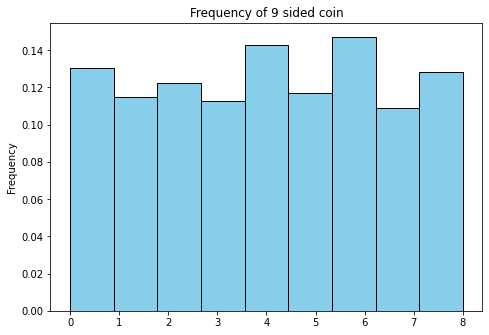

In [ ]:
def biased_coin_n(p): # Takes a list of input probabilities
    r = random()
    sum = 0
    ran = range(len(p))
    for i in ran: # looping over p
      sum+=p[i]
      if r<sum: return i
      
    return len(p)

N = 9
p = np.array([1/N for i in range(N)])
Coin_flips3 = [biased_coin_n(p) for i in range(1000)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(Coin_flips3, density=True, bins=N, color = 'skyblue', edgecolor = 'black')
ax.set_title('Frequency of 9 sided coin')
ax.set_ylabel('Frequency')


plt.show()

(d) Can you generalise this to sample from a continuous probability distribution? Write a function that outputs a random number $x$ in the interval $x\in [0,1]$ according to the probability density $$ p(x) = \frac{\pi}{2} \sin(\pi x).$$ Demonstrate your function with a histogram.

Text(0, 0.5, 'Frequency')

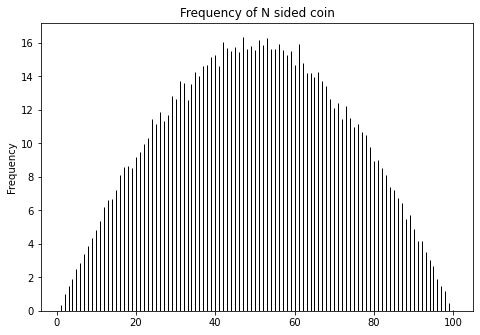

In [ ]:
x_range = np.arange(0,1,0.01)
p = 1/x_range.size * np.array([ np.pi/2*np.sin(np.pi*x) for x in x_range])

Coin_flips4 = [biased_coin_n(p) for i in range(100000)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(Coin_flips4, density=True, bins=100000, color = 'skyblue', edgecolor = 'black')
ax.set_title('Frequency of N sided coin')
ax.set_ylabel('Frequency')


4. In this exercise we will compare the thermal state of a qubit
$$ \hat{\rho}_\beta = \frac{{\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2}}{Z},$$
to the pure state
$$|\psi_\beta\rangle = \frac{1}{\sqrt{Z}}\left({\rm e}^{-\beta\hbar\omega/4}|0\rangle + {\rm e}^{\beta\hbar\omega/4}|1\rangle\right), $$
where $Z = {\rm tr}({\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2})$.

    (a) Write down general expressions for the density matrices corresponding to both of the above states.

    (b) Consider a projective measurement of the observable $\hat{\sigma}_z$. Give the probabilities of the two measurement outcomes for the thermal state $\hat{\rho}_\beta$. Give the analogous measurement outcome probabilities for the pure state $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_z\rangle$ for both states. Comment briefly on the results.

    (c) Now consider a projective measurement of the observable $\hat{\sigma}_x$. Give the measurement outcome probabilities for the two different states $\hat{\rho}_\beta$ and $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_x\rangle$ for both states. Comment briefly on the results.

    (d) Repeat the calculations for a projective measurement of $\hat{\sigma}_y$ and briefly comment on the result.

5. Consider the following simple decoherence model for a qubit. The Hamiltonian is 
$$ \hat{H} = \frac{\hbar\omega}{2} \hat{\sigma}_z,$$
where $\omega$ is a random variable that takes the values $\omega \in \{+\omega_0,-\omega_0\}$ with equal probabilities $p_+ = p_- = \tfrac{1}{2}$.
    
(a) Write down an analytical expression for the time-dependent density matrix describing the ensemble, starting from the initial condition $\hat{\rho}(0) = |+\rangle\langle +|$.
    
(b) The purity $P$ is defined by $P={\rm tr} \hat{\rho}^2$. It is a real number that varies between $P=1$ for a pure state and $P = 1/2$ for a maximally mixed state of a qubit. (More generally, $P$ varies between $1$ and $1/d$ for a system with Hilbert-space dimension $d$.) Plot the purity of the qubit density matrix as a function of time in the interval $\omega_0 t = [0,10]$. Comment briefly on what happens at $t = \pi/2\omega_0 $, $t = \pi/\omega_0 $, and $t=2\pi/\omega_0$.

at $w_0$t = $pi$/2 or 2$pi$ the purity is at a minimum (Maximally Mixed State)
at $w_0$t = $pi$ the purity is at a maximum (Pure State)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


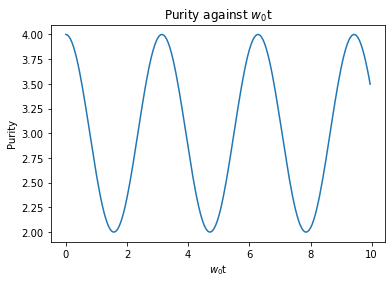

In [ ]:
def Density(t):
  return np.array([[1,np.cos(t)],[np.cos(t),1]])

def Purity(Density):
  return np.trace(np.matmul(Density,Density))

t = np.arange(0,10,0.05)

plt.plot(t,Purity(Density(t)))
plt.xlabel('$w_0$t')
plt.ylabel('Purity')
plt.title('Purity against $w_0$t')

print('at $w_0$t = $pi$/2 or 2$pi$ the purity is at a minimum (Maximally Mixed State)')
print('at $w_0$t = $pi$ the purity is at a maximum (Pure State)')

6. Now consider a qubit decoherence model, $\hat{H} = \hbar\omega\hat{\sigma}_z/2$, where the qubit transition frequency is a Gaussian random variable specified by the expectations
$$ \mathbb{E}[\omega] = \omega_0,\qquad \mathbb{E}[(\omega-\omega_0)^2] = g^2.$$

(a) Consider the evolution starting from the initial state $\hat{\rho}(0) = |+\rangle\langle +|$. Simulate $M=20$ random realisations of the qubit dynamics up to a time $\omega_0 t = 30$, with $g = 0.1\omega_0$. Plot the expectation value $\langle \hat{\sigma}_x\rangle$ as a function of time for each realisation (put them all on one plot). 

[1.01622586 1.04906401 0.96845986 1.09306954 1.06635644 0.91671781
 1.02315907 0.92938116 0.99382373 1.10190976 1.22222136 0.93955012
 1.05839646 0.98645419 0.77189756 0.92707403 1.0186647  1.01851463
 1.12077938 0.89899734]


Text(0.5, 1.0, 'Expectation Value of $\\sigma_x$ ')

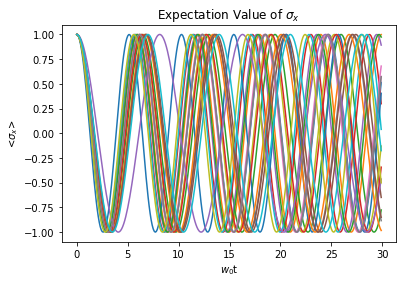

In [ ]:
from scipy import linalg
sigma = [[],[],[]]

sigma[2] = np.array([[1,0],[0,-1]])
sigma[1] = np.array([[0,-1j],[1j,0]])
sigma[0] = np.array([[0,1],[1,0]])
dt = .1

def H(omega): 
  return omega/2*sigma[2]

def U(dt,H): 
  return linalg.expm(-1j*H*dt)

def E_Value(Density):
  return np.real(np.trace(Density@sigma[0]))

w0 = 1

g = 0.1*w0

M = 20

omega = np.random.normal(w0, g, M)
print(omega)

x = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
y = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(M):
  Density = 0.5*np.ones([2,2])
  for t in np.arange(0, int(30/w0), dt):
    x[i].append(w0*t)
    y[i].append(E_Value(Density))
    Density = U(dt, H(omega[i]))@Density@U(dt, H(omega[i])).conj().T 
    
    
  

for i in range(M):
  plt.plot(x[i],y[i])

plt.xlabel('$w_0$t')
plt.ylabel('<$\sigma_x$>')
plt.title('Expectation Value of $\sigma_x$ ')      


(b) Plot the sample average of $\langle \hat{\sigma}_x\rangle$ from your simulated trajectories. The sample average is defined as
$$\overline{\langle \hat{\sigma}_x\rangle}_{\rm samp} = \frac{1}{M} \sum_{m=1}^M \langle \hat{\sigma}_x\rangle_m,$$
where $\langle \hat{\sigma}_x\rangle_m$ is the result for the $m^{\rm th}$ trajectory. How does this compare to what you expect for a very large number of trajectories $M\to\infty$?

Text(0.5, 1.0, 'Sample Average against $w_0$t')

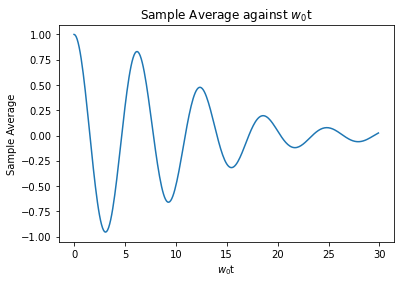

In [ ]:
M = 600
x = np.zeros([M,300])
y = np.zeros([M,300])
omega = np.random.normal(w0, g, M)

for i in range(M):
  Density = 0.5*np.ones([2,2])
  for j,t in enumerate(np.arange(0, int(30/w0), dt)):
    x[i,j] = w0*t
    y[i,j] = E_Value(Density)
    Density = U(dt, H(omega[i]))@Density@U(dt, H(omega[i])).conj().T 

Average = np.zeros(M)
for i in range(M):
  Average[i] = np.sum(y[i])/M
  
time = np.arange(0,30,0.1)


plt.plot(time,np.mean(y,axis=0))
plt.xlabel('$w_0$t')
plt.ylabel('Sample Average')
plt.title('Sample Average against $w_0$t')


7. The amplitude damping channel is a CPTP map for a qubit that describes the loss of energy, e.g. through spontaneous emission. The map is specified by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r} \hat{\sigma}_+\hat{\sigma}_- + \hat{\sigma}_-\hat{\sigma}_+,\qquad \hat{K}_1 = \sqrt{r}\hat{\sigma}_-,$$
where $\hat{\sigma}_\pm = \frac{1}{2}(\hat{\sigma}_x\pm{\rm i}\hat{\sigma}_y)$ are the usual qubit raising and lowering operators. 

    (a) Verify that the Kraus operators above constitute a CPTP map.
    
    (b) Starting from the superposition state $\hat{\rho} = |+\rangle\langle +|$, with $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, find the density matrix $\mathcal{E}(\hat{\rho})$ (e.g. numerically) and plot the expectation values of the three Pauli operators $\hat{\sigma}_{x,y,z}$ as a function of $r$.

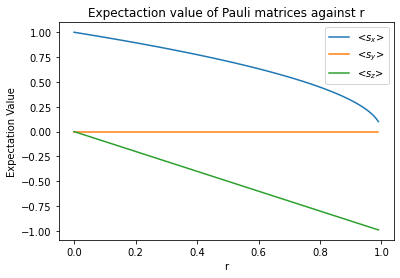

In [ ]:
sigma_plus  = .5*(sigma[0]+1j*sigma[1])
sigma_minus = .5*(sigma[0]-1j*sigma[1])

def K0(r):
  return (1-r)**.5*sigma_plus@sigma_minus+sigma_minus@sigma_plus

def K1(r):
  return r**.5*sigma_minus

Density = 0.5*np.ones((2,2))

def Density_evolved(r,Density):
  return K0(r)@Density@K0(r).conj().T + K1(r)@Density@K1(r).conj().T

r_range = np.arange(0,1,0.01)


def E_value(r,sigma):  
  return np.real(np.trace(Density_evolved(r,Density)@sigma))

E_values = np.zeros((3,100))

for k in range(3):
  for r in r_range:
    i = int(r*101)
    E_values[k][i] = E_value(r,sigma[k])
    

label = ['x','y','z']

for k in range(3):
  plt.plot(r_range,E_values[k], label = '<$s_%c$>'%label[k])

plt.xlabel('r')
plt.ylabel('Expectation Value')
plt.title('Expectaction value of Pauli matrices against r')
plt.legend()




(c) Now let us interpret the above Kraus operators as representing a generalised measurement with two outcomes. Write down analytical expressions for the probabilities of these two outcomes and the corresponding post-measurement states, assuming an arbitrary initial density matrix $\hat{\rho}$. Plot a histogram of the results that might be obtained from 200 such measurements on the state $\hat{\rho} = |+\rangle\langle +|$, assuming that $r=0.5$.

Text(0, 0.5, 'Frequency')

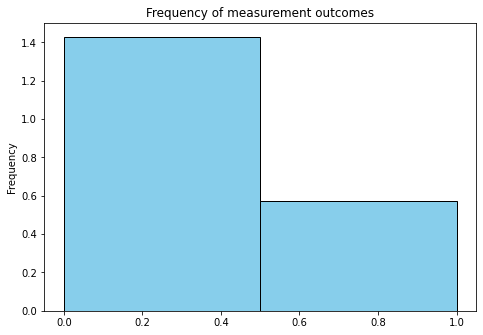

In [ ]:
Density = 0.5*np.ones((2,2))
r = 0.5
p = [np.trace(K0(r).conj().T @ K0(r)@Density),np.trace(K1(r).conj().T @ K1(r)@Density)]

Coin_flips5 = [biased_coin_n(p) for i in range(200)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(Coin_flips5, density=True, bins=2, color = 'skyblue', edgecolor = 'black')
ax.set_title('Frequency of measurement outcomes')
ax.set_ylabel('Frequency')

(d) Now consider the generalised measurement defined by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r}\hat{\sigma}_+\hat{\sigma}_-, \qquad \hat{K}_1 = \hat{\sigma}_-\hat{\sigma}_+, \qquad \hat{K}_2 = \sqrt{r}\hat{\sigma}_-.$$
As in part (c), give general expressions for the probabilities of each outcome and the corresponding post-measurement state. Simulate the outcome (i.e. plot a histogram) of 200 measurements on the state $\hat{\rho} = |+\rangle\langle +|$. How does this measurement differ from the one in part (c)?

This measurement differs from the previous one for the obvious reason that we have 3 possibilities instead of 2 
 and one of the probabilities appears to be 0


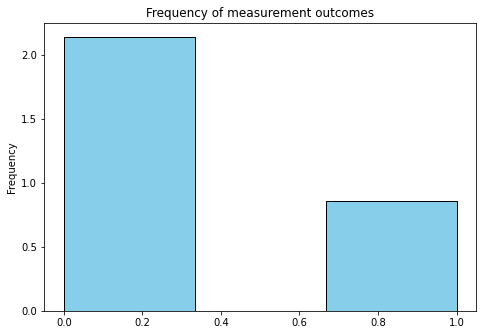

In [ ]:
def K2(r):
  return r**.5*sigma_minus

Density = 0.5*np.ones((2,2))
r = 0.5
p = [np.trace(K0(r).conj().T @ K0(r)@Density),np.trace(K1(r).conj().T @ K1(r)@Density),np.trace(K2(r).conj().T @ K2(r)@Density)]

Coin_flips6 = [biased_coin_n(p) for i in range(200)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(Coin_flips6, density=True, bins=3, color = 'skyblue', edgecolor = 'black')
ax.set_title('Frequency of measurement outcomes')
ax.set_ylabel('Frequency')

print('This measurement differs from the previous one for the obvious reason that we have 3 possibilities instead of 2 \n and one of the probabilities appears to be 0')


8. (a) The partial trace over one qubit of a two-qubit system is defined by

$$ \hat{\rho}_A = {\rm tr}_B ( \hat{\rho}) = \sum_{j=0}^1 \langle b_j| \hat{\rho}|b_j\rangle = \sum_{j=0}^1 (\hat{\mathbb{1}}_A\otimes\langle b_j|) \hat{\rho}(\hat{\mathbb{1}}_A\otimes| b_j\rangle), $$

where $\{|b_j\rangle\}$ is any orthonormal basis in the Hilbert space of qubit $B$. Assume that $|b_{0}\rangle = |0\rangle$ and $|b_1\rangle = |1\rangle$ are the computational basis states. Construct the Kraus operators describing the above CPTP map. Verify numerically that the Kraus operators obey the completeness relation required for a CPTP map.

In [ ]:
r_range = np.arange(0,1,1)

def K0_1(r):
  return (1-r)**.5*sigma_plus@sigma_minus 
  
def K1_1(r):
  return sigma_minus@sigma_plus 
  
def K2_1(r):
  return r**.5*sigma_minus 

def K0_2(r):
  return (1-r)**.5*sigma_plus@sigma_minus+sigma_minus@sigma_plus 

def K1_2(r):
  return r**.5*sigma_minus

Completeness_Relation_1 = np.array([K0_1(r).conj().T@K0_1(r)+K1_1(r).conj().T@K1_1(r)+K2_1(r).conj().T@K2_1(r)  for r in r_range])
Completeness_Relation_2 = np.array([K0_2(r).conj().T@K0_2(r)+K1_2(r).conj().T@K1_2(r) for r in r_range])


print(Completeness_Relation_1)
print(Completeness_Relation_2)

print('\nBoth of our Completeness relations give us the identity. ')

[[[1.+0.j 0.+0.j]
  [0.+0.j 1.+0.j]]]
[[[1.+0.j 0.+0.j]
  [0.+0.j 1.+0.j]]]

Both of our Completeness relations give us the identity. 


(b) Now consider again the two-qubit problem described by the Hamiltonian

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z,$$

which we saw in question 8 of Worksheet 1. Simulate the dynamics starting from the pure state $|\psi(0)\rangle = |10\rangle$. Use the parameters $\omega_A = \omega_B$ and $J=V = 0.5\omega_A$, and simulate up to a time $Jt = 20$. (You can either re-use your solution from Worksheet 1, or adapt the code from the solution provided.) Compute the reduced density matrix of qubit $A$ and plot its purity, $P = {\rm tr}(\hat{\rho}_A^2)$, as a function of time.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Purity of the Reduced Density Matrix over time')

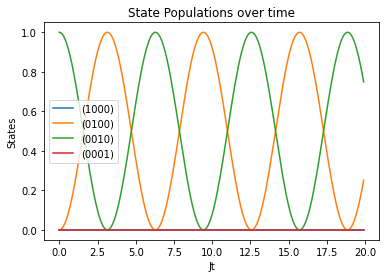

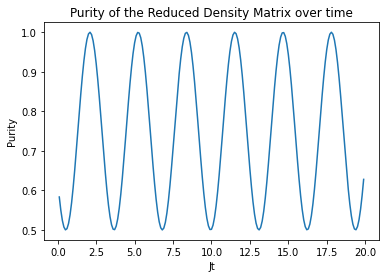

In [ ]:
J = 1
V = 1
wa = 2*J
wb = 2*J
dt = .1
t_range = np.arange(0, 20, dt)

def partial_trace(Density):
  basis = np.array([[[1],[0]],[[0],[1]]])
  return np.sum(np.array([np.kron(np.eye(2),state).conj().T@Density@np.kron(np.eye(2),state) for state in basis]),axis=0)

phi_t = np.kron(np.array([[0],[1]]),np.array([[1],[0]]))
states   = np.zeros((t_range.size, 4))


H = .5*( -wa*np.kron(sigma[2],np.eye(2)) - wb*np.kron(np.eye(2),sigma[2]) + .5*J*(np.kron(sigma[0],sigma[0]) + np.kron(sigma[1],sigma[1])) + V*np.kron(sigma[2],sigma[2])) 


for i in range(t_range.size): 
  states[i] = np.array([phi_t[j,0].real for j in range(4)])
  phi_t  = U(dt, H)@phi_t


for i, label in enumerate(['(1000)','(0100)','(0010)','(0001)']):
  plt.plot(t_range, states[:,i], label = label)

plt.title('State Populations over time')
plt.xlabel('Jt')
plt.ylabel('States') 
plt.legend() 


Density = phi_t@phi_t.conj().T
trace_t = np.zeros(t.size, dtype=complex) 

for i in range(t.size): 
  trace_t[i] = np.trace( np.linalg.matrix_power(partial_trace(Density), 2) ).real
  Density        = U(dt,H)@Density@U(dt,H).conj().T

plt.figure()
plt.plot(t,trace_t)
plt.xlabel('Jt') 
plt.ylabel('Purity') 
plt.title('Purity of the Reduced Density Matrix over time')

(c) Repeat the purity calculation of part (b) but with the parameters $\omega_A = 2\omega_B$ and $J=V=0.5\omega_A$. Comment on the differences between the results of (b) and (c).

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)






The populations of (1000) and (0001) are zero in both cases. The Purity of the Reduced Density matrix oscillates between maximally mixed and pure in both examples.


The populations (0100) and (0010) are anti-phased in the first example but not in the second.


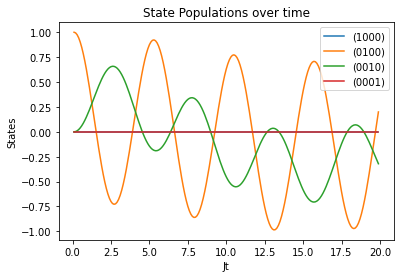

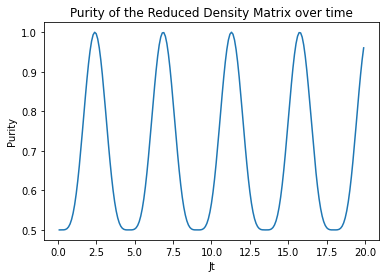

In [ ]:
V=1
J=1
wa = 2*J
wb = wa*0.5
t_range = np.arange(.1, 20, dt)

phi_t = np.kron(np.array([[1],[0]]),np.array([[0],[1]]))
states   = np.zeros((t_range.size, 4))

H = .5*( -wa*np.kron(sigma[2],np.eye(2)) - wb*np.kron(np.eye(2),sigma[2]) + .5*hJ*(np.kron(sigma[0],sigma[0]) + np.kron(sigma[1],sigma[1])) + V*np.kron(sigma[2],sigma[2])) 

for i in range(t_range.size): 
  states[i] = np.array([phi_t[j,0].real for j in range(4)])
  phi_t  = U(dt, H)@phi_t


for i, label in enumerate(['(1000)','(0100)','(0010)','(0001)']):
  plt.plot(t_range, states[:,i], label = label)

plt.title('State Populations over time')
plt.xlabel('Jt')
plt.ylabel('States') 
plt.legend() 


Density = phi_t@phi_t.conj().T
trace_t = np.zeros(t.size, dtype=complex) 

for i in range(t.size): 
  trace_t[i] = np.trace( np.linalg.matrix_power(partial_trace(Density), 2) ).real
  Density        = U(dt,H)@Density@U(dt,H).conj().T

plt.figure()
plt.plot(t,trace_t)
plt.xlabel('Jt') 
plt.ylabel('Purity') 
plt.title('Purity of the Reduced Density Matrix over time')

print('\n')
print('\n')
print('The populations of (1000) and (0001) are zero in both cases. The Purity of the Reduced Density matrix oscillates between maximally mixed and pure in both examples.')

print('\n')
print('The populations (0100) and (0010) are anti-phased in the first example but not in the second.')